In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

id_data = pd.read_csv('Metadata.csv')
id_data

,id,building id
0,building_class,building classification
1,floor_area,floor area (in square feet) of the building
2,year_built,year in which the building was constructed
3,precipitation_inches,annual precipitation in inches at the location...
4,snowfall_inches,annual snowfall in inches at the location of t...
5,avg_temp,average temperature over a year at the locatio...
6,days_with_fog,number of days with fog at the location of the...
7,eui,Site Energy Usage Intensity is the amount of h...


In [3]:
print(open('ClimateData.csv', 'r').read())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
data = pd.read_csv('ClimateData.csv')
data

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,NaN,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,NaN,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,NaN,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,NaN,592.02


# 1.
Take a look at the data types and summary of our variables.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    75757 non-null  int64  
 1   building_class        75757 non-null  object 
 2   floor_area            75757 non-null  float64
 3   year_built            73920 non-null  float64
 4   precipitation_inches  75757 non-null  float64
 5   snowfall_inches       75757 non-null  float64
 6   avg_temp              75757 non-null  float64
 7   days_with_fog         29961 non-null  float64
 8   site_eui              75757 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.2+ MB


# 2.
Summarize the number of unique values in each column.

In [6]:
pd.value_counts(data['id'])

0        1
50493    1
50509    1
50508    1
50507    1
        ..
25252    1
25251    1
25250    1
25249    1
75756    1
Name: id, Length: 75757, dtype: int64

In [7]:
pd.value_counts(data['building_class'])

Residential    43558
Commercial     32199
Name: building_class, dtype: int64

In [8]:
pd.value_counts(data['floor_area'])

60000.0     264
70000.0     213
80000.0     176
75000.0     173
72000.0     173
           ... 
450500.0      1
354100.0      1
123290.0      1
133280.0      1
40489.0       1
Name: floor_area, Length: 20433, dtype: int64

In [9]:
pd.value_counts(data['year_built'])

1927.0    2064
1929.0    1999
1928.0    1979
1930.0    1811
1925.0    1710
          ... 
1878.0       1
1829.0       1
1844.0       1
1871.0       1
1815.0       1
Name: year_built, Length: 180, dtype: int64

In [10]:
pd.value_counts(data['precipitation_inches'])

42.17    13015
40.97    10144
53.79     9267
38.51     8362
46.32     8296
         ...  
3.02         1
77.19        1
63.43        1
29.97        1
41.11        1
Name: precipitation_inches, Length: 171, dtype: int64

In [11]:
pd.value_counts(data['snowfall_inches'])

36.0    13015
49.1    10144
50.0     9267
0.0      8726
9.6      8363
        ...  
50.5        1
51.4        1
54.6        1
63.5        1
0.5         1
Name: snowfall_inches, Length: 71, dtype: int64

In [12]:
pd.value_counts(data['avg_temp'])

57.215847    13015
56.835616    10144
54.501370     9267
57.366120     8362
55.449315     8296
             ...  
53.750000        1
52.959016        1
61.494536        1
51.658470        1
46.611570        1
Name: avg_temp, Length: 173, dtype: int64

In [13]:
pd.value_counts(data['days_with_fog'])

131.0    5386
99.0     4287
148.0    2614
56.0     2216
106.0    1967
79.0     1854
12.0     1761
110.0    1529
93.0     1442
104.0    1097
267.0     765
111.0     691
116.0     635
261.0     620
88.0      576
63.0      488
65.0      482
73.0      327
176.0     316
101.0     237
311.0     143
87.0       98
161.0      95
114.0      65
31.0       60
125.0      48
58.0       35
289.0      27
113.0      26
120.0      22
90.0       12
82.0        8
37.0        7
178.0       5
86.0        4
84.0        3
126.0       3
51.0        3
156.0       2
184.0       2
89.0        2
107.0       1
Name: days_with_fog, dtype: int64

In [14]:
pd.value_counts(data['site_eui'])

79.78     48
76.89     46
72.20     46
69.21     45
67.71     45
          ..
376.17     1
210.94     1
120.61     1
462.69     1
592.02     1
Name: site_eui, Length: 17203, dtype: int64

# 3.
Check at descriptive statistics for the Dataset

In [15]:
data.describe()

,id,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
count,75757.000000,7.575700e+04,73920.000000,75757.000000,75757.000000,75757.000000,29961.000000,75757.000000
mean,37878.000000,1.659839e+05,1952.306764,42.430651,29.136379,56.176705,109.142051,82.584707
std,21869.306509,2.468758e+05,37.053619,10.592205,17.810894,2.241940,50.699751,58.255413
min,0.000000,9.430000e+02,0.000000,0.000000,0.000000,44.512329,12.000000,1.000000
25%,18939.000000,6.237900e+04,1927.000000,39.350000,9.600000,55.147541,88.000000,54.530000
50%,37878.000000,9.136700e+04,1951.000000,42.170000,31.600000,56.835616,104.000000,75.290000
75%,56817.000000,1.660000e+05,1977.000000,46.320000,49.100000,57.215847,131.000000,97.280000
max,75756.000000,6.385382e+06,2015.000000,107.690000,127.300000,77.245205,311.000000,997.870000


# 4.
Check the number of missing values.

In [16]:
#checking the data set for null values
data.isnull()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
75752,False,False,False,False,False,False,False,True,False
75753,False,False,False,False,False,False,False,True,False
75754,False,False,False,False,False,False,False,True,False
75755,False,False,False,False,False,False,False,True,False


In [17]:
data.isnull().sum()

id                          0
building_class              0
floor_area                  0
year_built               1837
precipitation_inches        0
snowfall_inches             0
avg_temp                    0
days_with_fog           45796
site_eui                    0
dtype: int64

# 5.
Take care of missing data

In [18]:
# the years built were mostly in the 1900 and a few in the 2000s, so I used the mean to fill the empty data with the average. 
years_built=data.fillna(value=data['year_built'].mean())
fog=data.fillna(value=data['days_with_fog'].mean())

fog


,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,109.142051,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.000000,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.000000,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.000000,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,109.142051,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,109.142051,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,109.142051,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,109.142051,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,109.142051,592.02


In [19]:
fog['year_built']


0        1942.0
1        1955.0
2        1951.0
3        1980.0
4        1985.0
          ...  
75752    1995.0
75753    1910.0
75754    1917.0
75755    2012.0
75756    1974.0
Name: year_built, Length: 75757, dtype: float64

In [20]:
fog.isnull().sum()

id                      0
building_class          0
floor_area              0
year_built              0
precipitation_inches    0
snowfall_inches         0
avg_temp                0
days_with_fog           0
site_eui                0
dtype: int64

# 6.
Find and remove duplicate variables

In [21]:
# Bacuse snow falls under the category of precipitation, we can remove it because we already have data on precipitation
# Presipitation is an ubrella term for any liquid forms falling from the sky
drop=fog.drop('snowfall_inches',axis=1)
drop

,id,building_class,floor_area,year_built,precipitation_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,56.972603,109.142051,248.68
1,1,Commercial,274000.0,1955.0,16.59,56.972603,12.000000,26.50
2,2,Commercial,280025.0,1951.0,16.59,56.972603,12.000000,24.69
3,3,Commercial,55325.0,1980.0,16.59,56.972603,12.000000,48.41
4,4,Commercial,66000.0,1985.0,16.59,56.972603,109.142051,3.90
...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,55.147541,109.142051,132.92
75753,75753,Residential,40489.0,1910.0,45.03,55.147541,109.142051,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,47.911202,109.142051,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,47.911202,109.142051,592.02


In [22]:
# the year the building was built doesnt pertain to climate change
droptwo=drop.drop('year_built',axis=1)
droptwo

,id,building_class,floor_area,precipitation_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,16.59,56.972603,109.142051,248.68
1,1,Commercial,274000.0,16.59,56.972603,12.000000,26.50
2,2,Commercial,280025.0,16.59,56.972603,12.000000,24.69
3,3,Commercial,55325.0,16.59,56.972603,12.000000,48.41
4,4,Commercial,66000.0,16.59,56.972603,109.142051,3.90
...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,45.03,55.147541,109.142051,132.92
75753,75753,Residential,40489.0,45.03,55.147541,109.142051,39.48
75754,75754,Commercial,28072.0,106.32,47.911202,109.142051,48.40
75755,75755,Commercial,53575.0,106.32,47.911202,109.142051,592.02


# 7.
Encode the categorical variables; you can use label encoding, one hot encoding, or...

In [24]:
# the only catergorical variable is building class and it is a binomial
newdata = droptwo.replace(('Residential', 'Commercial'),(0,1))
newdata

,id,building_class,floor_area,precipitation_inches,avg_temp,days_with_fog,site_eui
0,0,1,61242.0,16.59,56.972603,109.142051,248.68
1,1,1,274000.0,16.59,56.972603,12.000000,26.50
2,2,1,280025.0,16.59,56.972603,12.000000,24.69
3,3,1,55325.0,16.59,56.972603,12.000000,48.41
4,4,1,66000.0,16.59,56.972603,109.142051,3.90
...,...,...,...,...,...,...,...
75752,75752,1,20410.0,45.03,55.147541,109.142051,132.92
75753,75753,0,40489.0,45.03,55.147541,109.142051,39.48
75754,75754,1,28072.0,106.32,47.911202,109.142051,48.40
75755,75755,1,53575.0,106.32,47.911202,109.142051,592.02


# 8.
Create the boxplot and show the outlier.

Text(0.5, 1.0, 'Floor Area Boxplot')

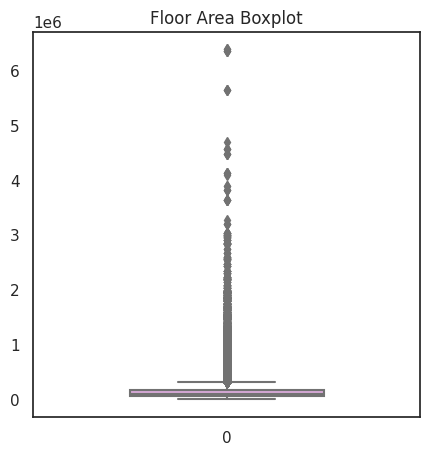

In [25]:
import seaborn as sns
sns.set(style='white')
plt.subplots(figsize=(5,5))
sns.boxplot(newdata['floor_area'],color='plum', width=0.5, orient ='v')
plt.title('Floor Area Boxplot')

Text(0.5, 1.0, 'Percipitation Boxplot')

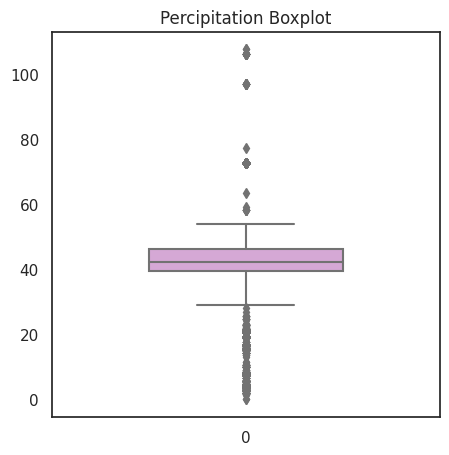

In [26]:
import seaborn as sns
sns.set(style='white')
plt.subplots(figsize=(5,5))
sns.boxplot(newdata['precipitation_inches'],color='plum', width=0.5, orient ='v')
plt.title('Percipitation Boxplot')

Text(0.5, 1.0, 'Average Temp Boxplot')

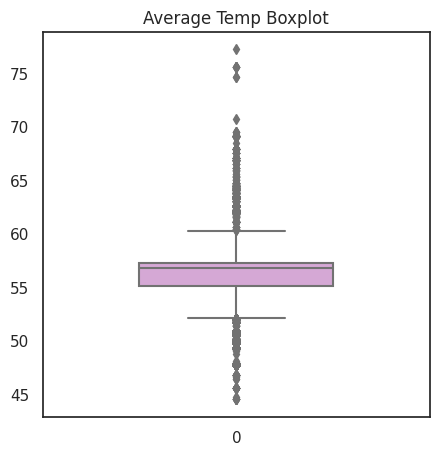

In [27]:
import seaborn as sns
sns.set(style='white')
plt.subplots(figsize=(5,5))
sns.boxplot(newdata['avg_temp'],color='plum', width=0.5, orient ='v')
plt.title('Average Temp Boxplot')

Text(0.5, 1.0, 'Fog Boxplot')

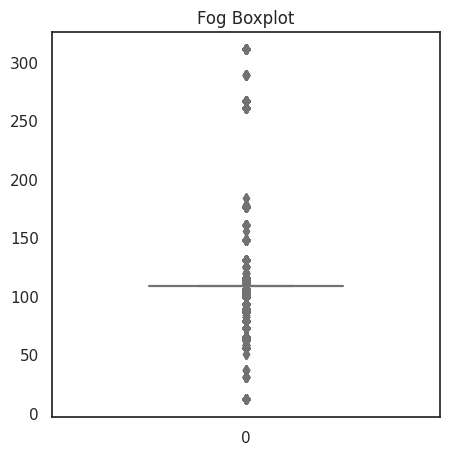

In [28]:
import seaborn as sns
sns.set(style='white')
plt.subplots(figsize=(5,5))
sns.boxplot(newdata['days_with_fog'],color='plum', width=0.5, orient ='v')
plt.title('Fog Boxplot')

Text(0.5, 1.0, 'Site Energy Usage Boxplot')

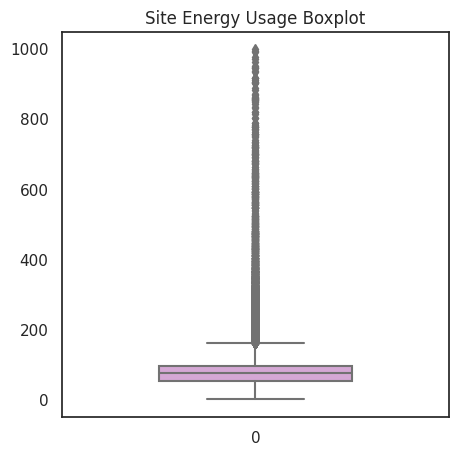

In [29]:
import seaborn as sns
sns.set(style='white')
plt.subplots(figsize=(5,5))
sns.boxplot(newdata['site_eui'],color='plum', width=0.5, orient ='v')
plt.title('Site Energy Usage Boxplot')

# 9.
Create thehistogram and check the outliers

array([[<AxesSubplot:title={'center':'floor_area'}>]], dtype=object)

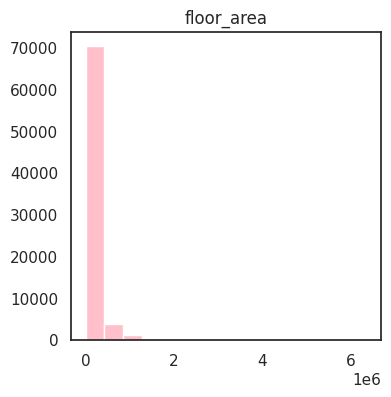

In [30]:
newdata.hist(column='floor_area', bins=15, grid= False, figsize= (4,4), color='pink')

array([[<AxesSubplot:title={'center':'precipitation_inches'}>]],
      dtype=object)

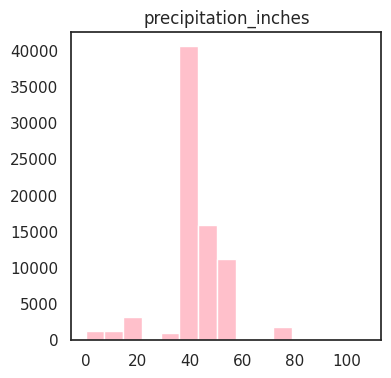

In [31]:
newdata.hist(column='precipitation_inches', bins=15, grid= False, figsize= (4,4), color='pink')

array([[<AxesSubplot:title={'center':'avg_temp'}>]], dtype=object)

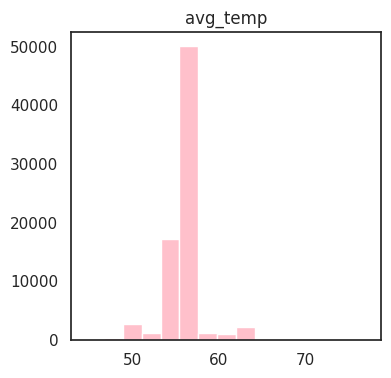

In [32]:
newdata.hist(column='avg_temp', bins=15, grid= False, figsize= (4,4), color='pink')

array([[<AxesSubplot:title={'center':'days_with_fog'}>]], dtype=object)

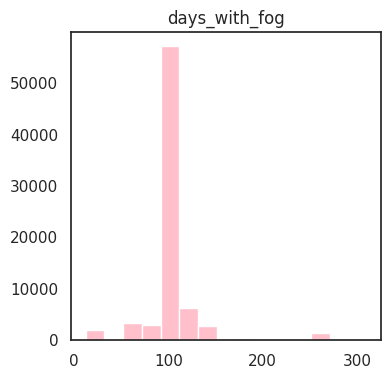

In [33]:
newdata.hist(column='days_with_fog', bins=15, grid= False, figsize= (4,4), color='pink')

In [ ]:
newdata.hist(column='site_eui', bins=15, grid= False, figsize= (4,4), color='pink')